## Introduction to rat data

This is quick and dirty run through of some different kinds of data you might encounter in electrophysiology data.... 

[CLICK HERE](http://ctnsrv.uwaterloo.ca/vandermeerlab/doku.php?id=analysis:nsb2016) for indepth tutorials  
[OR HERE](https://github.com/youkitan/vandermeerlab/tree/master/code-matlab/example_workflows) for example workflow notebooks

In [1]:
from vdmtools import loadmat
from vdmtools import printm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cd ratdata/R050-2014-04-02

/Users/youkitanaka/Documents/Github/hypertools-fork/sandbox_rats/ratdata/R050-2014-04-02


In [3]:
ls

ExpKeys.mat   lfpTH.mat     position.mat
lfpSWR.mat    metadata.mat  spikes.mat


Here is our top level view of the session data. We have our two lfp files `lfpTh` and `lfpSWR` which are local field potential data. We have our spike trains saved as timestamps in `spikes` and the position of the rat in `position`. For information on what `ExpKeys` and `metadata` are, check out [THIS](https://github.com/vandermeerlab/vandermeerlab/blob/master/doc/HOWTO_ExpKeys_Metadata.md). For more information on the different datatypes (what they are and how they are recorded) check out our [wiki](http://ctnsrv.uwaterloo.ca/vandermeerlab/doku.php?id=analysis:nsb2016:week2)

### Loading data

The `loadmat` function takes a MATLAB nested struct and conversts it into a nested dictionary. Using `printm` allows you to easily view the keys of the dictionary (in MATLAB, fields of the struct) at the top level:

In [4]:
data = loadmat('position.mat')
printm(data)

  position   <class 'dict'> ['data', 'type', 'cfg', 'label', 'units', 'tvec']


For fun, invoke the data *without* `printm`. Jupyter will print all of the data (and it's messy!). For now, stick to `printm`. Since we saved all of that sessions data in one struct, there is only one top level key.

When you first load a `.mat` file, it will load each MATLAB variable as a separate dictionary key,value pair. In our case, each `.mat` file is a single variable. The way to navigate through the nested data structure is to simply invoke the key for the data you want to access as such,
`DICT['KEYSTRING']`. Remember, you can add as many keys as you want if you already know the data structure.

In [5]:
pos = data['position']
printm(pos)

   data   <class 'numpy.ndarray'> (2, 133233)
   type             <class 'str'> tsd  
    cfg            <class 'dict'> ['SessionID', 'history', 'ExpKeys']
  label   <class 'numpy.ndarray'> (2,) 
  units             <class 'str'> px   
   tvec   <class 'numpy.ndarray'> (133233,)


As long as you know the keys to access, you can chain keys to call on any lower level dictionaries:

In [10]:
printm(pos['cfg']['ExpKeys']['RestrictionType'])

food


### Datatypes
Here are some examples of different kinds of data to play with:

#### Position data

We already loaded this data, so let's visualize!

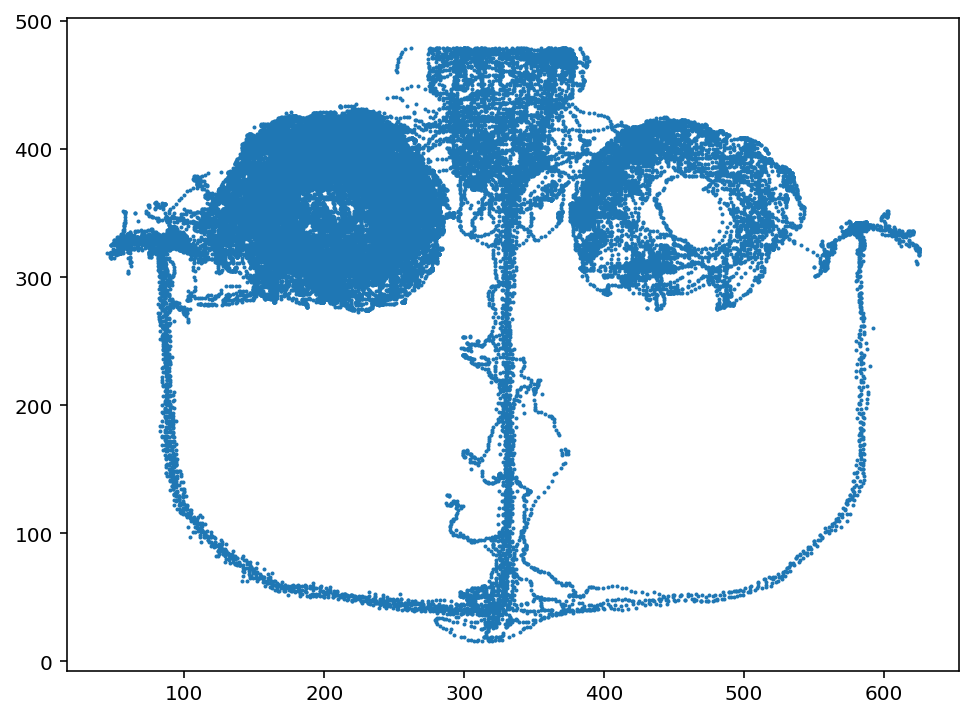

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(pos['data'][0,:],pos['data'][1,:],1)
plt.show();

#### Spike train data

In [15]:
data = loadmat('spikes.mat')
S = data['spikes']
printm(S)

  label   <class 'numpy.ndarray'> (92,)
   type             <class 'str'> ts   
    usr            <class 'dict'> ['tt_num']
      t   <class 'numpy.ndarray'> (92,)
    cfg            <class 'dict'> ['SessionID', 'history', 'ExpKeys']


The spike times stored in the `t` field. Each value in `S['t']` is an array of time stamps.

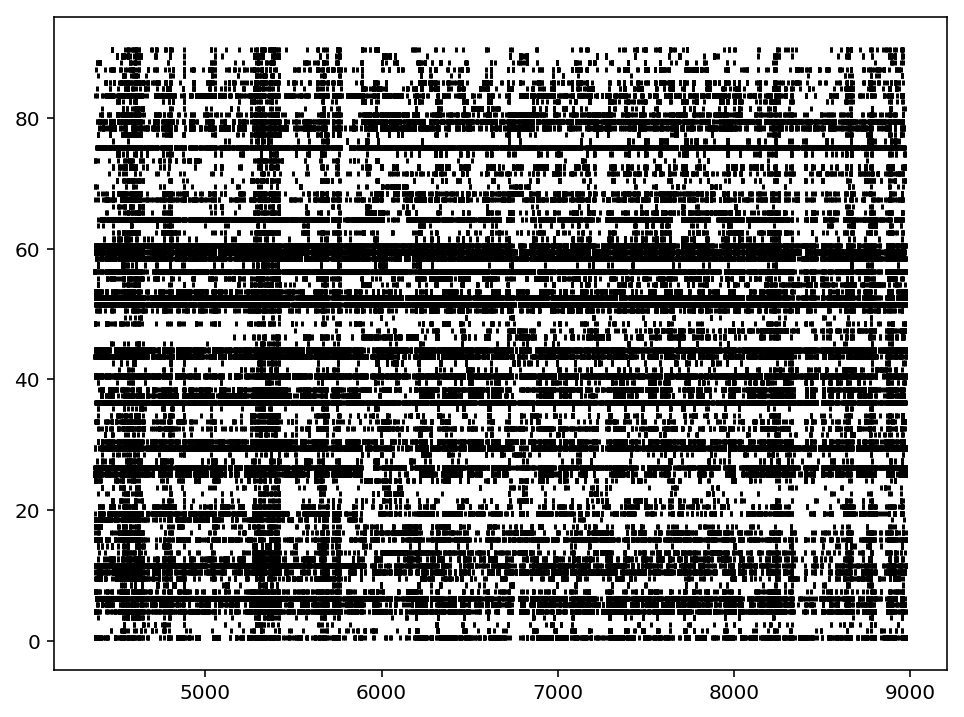

In [16]:
plt.figure(figsize=(8,6))
for i in range(np.size(S['t'])-1):
    plt.vlines(S['t'][i],0.1+i,0.9+i)
plt.show();

#### LFP data

In [23]:
data = loadmat('lfpSWR.mat')
SWR = data['lfpSWR']
printm(SWR)

   data   <class 'numpy.ndarray'> (9186304,)
   type             <class 'str'> tsd  
    cfg            <class 'dict'> ['hdr', 'SessionID', 'history', 'ExpKeys']
  label             <class 'str'> R050-2014-04-02-CSC07a.ncs
  units             <class 'str'> V    
   tvec   <class 'numpy.ndarray'> (9186304,)


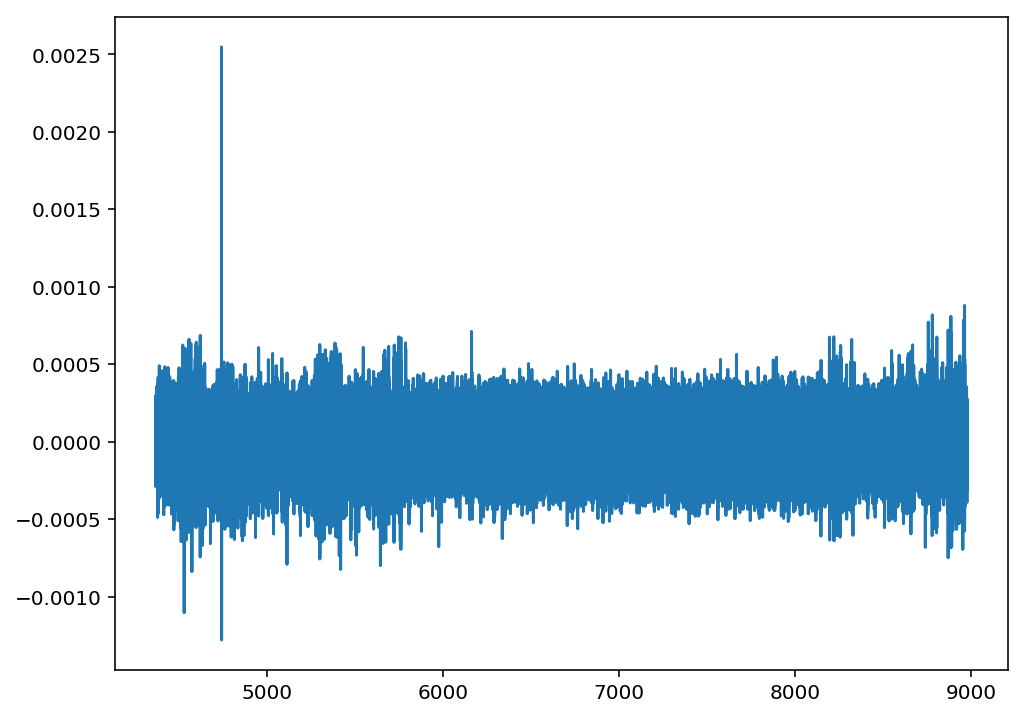

In [24]:
plt.figure(figsize=(8,6))
plt.plot(SWR['tvec'],SWR['data'])
plt.show();

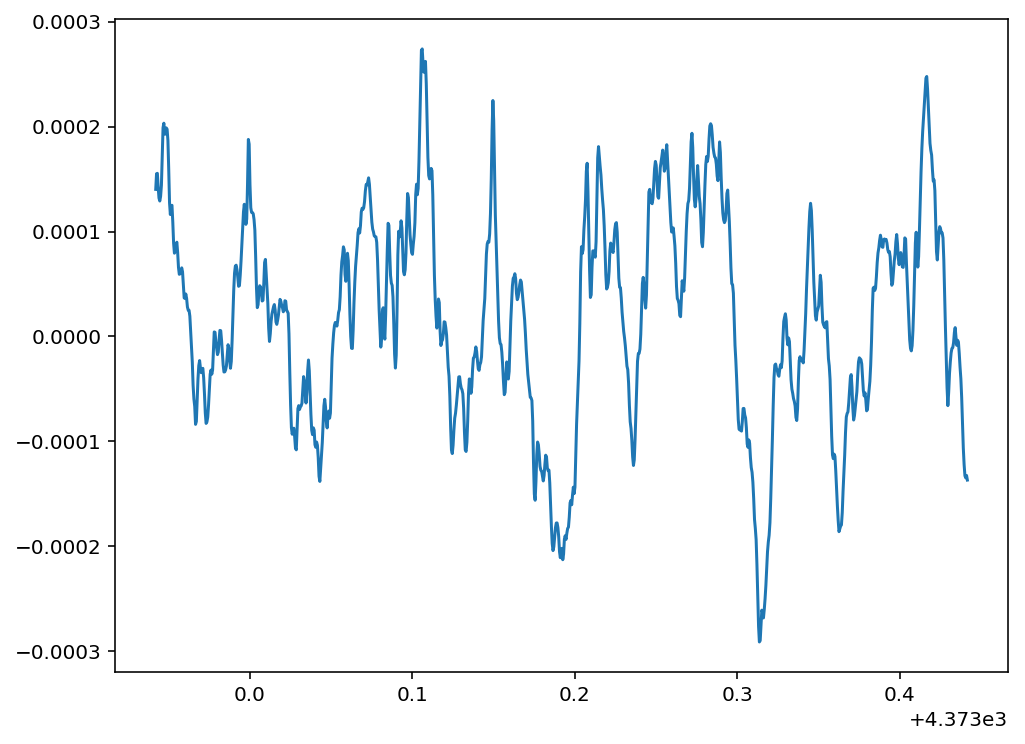

In [25]:
plt.figure(figsize=(8,6))
plt.plot(SWR['tvec'][3000:4000],SWR['data'][3000:4000])
plt.show();